In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.

The first plot will be and/or feature the following:

Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.
The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.



In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
import matplotlib.patches as mpatches

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#the target news organziations
# Target Search Term
# target_terms = ("@BBC", "@CBS", "@CNN",
#                 "@FoxNews", "@nytimes")


In [3]:
# Target User
target_user = ["@BBC", "@CNN", "@CBS", "@FoxNews", "@nytimes"]

#Create dataframe to store all Tweets for each company and time
newsTweets_df = pd.DataFrame()

indexCntr = 0
newsCo_cntr = 0
# Tweet Texts
tweet_texts = []
# Loop through all target users
for target in target_user:
    print ('Target = ', target_user[newsCo_cntr])


    #nbr of tweets for certain newco
    tweet_ago = 1
    # Create a loop to iteratively run API requests
    for x in range(5):#5 to get the top 100

        # Get all tweets from home feed (for each page specified)
        public_tweets = api.user_timeline(target_user[newsCo_cntr], page=x+1)

        # Loop through all tweets
        for tweet in public_tweets:

            # Print Tweet
            print('\nTweet nbr:', indexCntr, ' for :', target_user[newsCo_cntr])
            print('\n------------------')
            #print(tweet["text"])

            # Store Tweet in Array
            #tweet_texts.append(tweet["text"])
            newsTweets_df.set_value(indexCntr, "text", tweet['text'])
            newsTweets_df.set_value(indexCntr, "twtAgo", tweet_ago)
            newsTweets_df.set_value(indexCntr, "time", tweet['created_at'])
            newsTweets_df.set_value(indexCntr, "newsCo", target_user[newsCo_cntr])
            tweet_ago = tweet_ago + 1

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
          
            newsTweets_df.set_value(indexCntr, "compound", results['compound'])
            
            newsTweets_df.set_value(indexCntr, "pos", results['pos'])
            
            newsTweets_df.set_value(indexCntr, "neu", results['neu'])
            
            newsTweets_df.set_value(indexCntr, "neg", results['neg'])

            #finish the loop and increment counter
            indexCntr = indexCntr + 1
    newsCo_cntr = newsCo_cntr + 1
        

Target =  @BBC

Tweet nbr: 0  for : @BBC

------------------

Tweet nbr: 1  for : @BBC

------------------

Tweet nbr: 2  for : @BBC

------------------

Tweet nbr: 3  for : @BBC

------------------

Tweet nbr: 4  for : @BBC

------------------

Tweet nbr: 5  for : @BBC

------------------

Tweet nbr: 6  for : @BBC

------------------

Tweet nbr: 7  for : @BBC

------------------

Tweet nbr: 8  for : @BBC

------------------

Tweet nbr: 9  for : @BBC

------------------

Tweet nbr: 10  for : @BBC

------------------

Tweet nbr: 11  for : @BBC

------------------

Tweet nbr: 12  for : @BBC

------------------

Tweet nbr: 13  for : @BBC

------------------

Tweet nbr: 14  for : @BBC

------------------

Tweet nbr: 15  for : @BBC

------------------

Tweet nbr: 16  for : @BBC

------------------

Tweet nbr: 17  for : @BBC

------------------

Tweet nbr: 18  for : @BBC

------------------

Tweet nbr: 19  for : @BBC

------------------

Tweet nbr: 20  for : @BBC

------------------

Tweet n

In [4]:
#create data frames for calculations for graphs

bbc_df = newsTweets_df.loc[newsTweets_df["newsCo"] == "@BBC",:]
cnn_df = newsTweets_df.loc[newsTweets_df["newsCo"] == "@CNN",:]
cbs_df = newsTweets_df.loc[newsTweets_df["newsCo"] == "@CBS",:]
fox_df = newsTweets_df.loc[newsTweets_df["newsCo"] == "@FoxNews",:]
nyt_df = newsTweets_df.loc[newsTweets_df["newsCo"] == "@nytimes",:]


In [5]:
#create average compound scores for each news outlet
bbc_avg = bbc_df['compound'].mean()
cnn_avg = cnn_df['compound'].mean()
cbs_avg = cbs_df['compound'].mean()
fox_avg = fox_df['compound'].mean()
nyt_avg = nyt_df['compound'].mean()

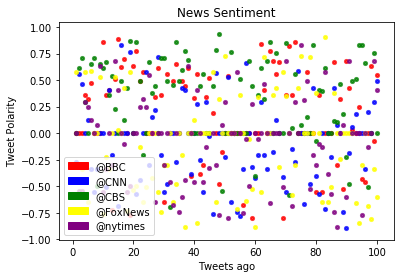

In [6]:
# Build scatter plot of the compound of each newsCo

#BBC Plots
x_bbc = bbc_df['twtAgo']
y_bbc = bbc_df['compound']
plt.scatter(x_bbc, y_bbc, s=10, c='red', alpha=.75,linewidth=2)

#cnn Plots
x_cnn = cnn_df['twtAgo']
y_cnn = cnn_df['compound']
plt.scatter(x_cnn, y_cnn, s=10, c='blue', alpha=.75,linewidth=2)

#cbs Plots
x_cbs = cbs_df['twtAgo']
y_cbs = cbs_df['compound']
plt.scatter(x_cbs, y_cbs, s=10, c='green', alpha=.75,linewidth=2)

#fox Plots
x_fox = fox_df['twtAgo']
y_fox = fox_df['compound']
plt.scatter(x_fox, y_fox, s=10, c='yellow', alpha=.75,linewidth=2)

#nyt Plots
x_nyt = nyt_df['twtAgo']
y_nyt = nyt_df['compound']
plt.scatter(x_nyt, y_nyt, s=10, c='purple', alpha=.75,linewidth=2)


# Add titles (main and on axis)
plt.xlabel("Tweets ago")
plt.ylabel("Tweet Polarity")
plt.title("News Sentiment")
#plt.legend([red_dot, blue_patch, gold_patch], ['@BBC', '@CNN','@CBS','@FoxNews','@nytimes'])
#plt.legend([red_bbc, blue_cnn], ["@BBC", "@CNN"])
bbc_mk = mpatches.Patch(color='red')
cnn_mk = mpatches.Patch(color='blue')
cbs_mk = mpatches.Patch(color='green')
fox_mk = mpatches.Patch(color='yellow')
nyt_mk = mpatches.Patch(color='purple')
#plt.legend(loc="best")
plt.legend([bbc_mk, cnn_mk, cbs_mk, fox_mk, nyt_mk], ['@BBC', '@CNN','@CBS','@FoxNews','@nytimes'], loc='best') 
# Save the figure
plt.savefig("NewSentiment.png")
plt.show()


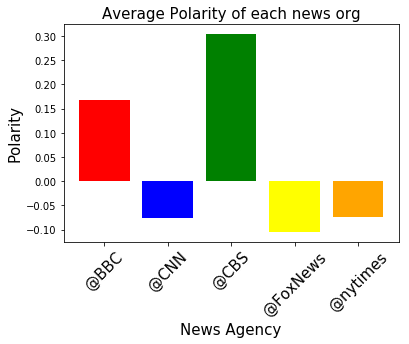

In [7]:
# Build scatter plot of the compound of each newsCo
x = ['@BBC', '@CNN', '@CBS', '@FoxNews', '@nytimes']
y = [bbc_avg, cnn_avg, cbs_avg, fox_avg, nyt_avg]
c = ['red', 'blue', 'green', 'yellow', 'orange']
index = np.arange(len(x))
plt.bar(index, y, color = c)
plt.xlabel('News Agency', fontsize=15)
plt.ylabel('Polarity', fontsize=15)
plt.xticks(index, x, fontsize=15, rotation=45)
plt.title('Average Polarity of each news org', fontsize=15)
# Save the figure
plt.savefig("AgrSentiment.png")
plt.show()
